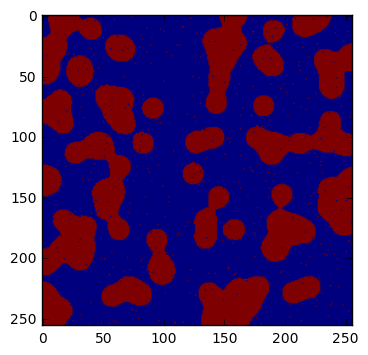

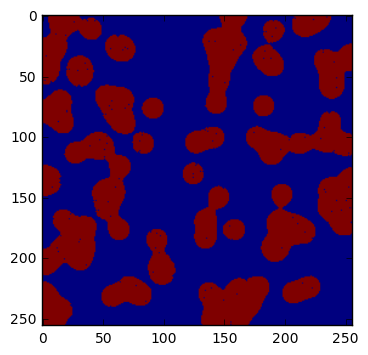

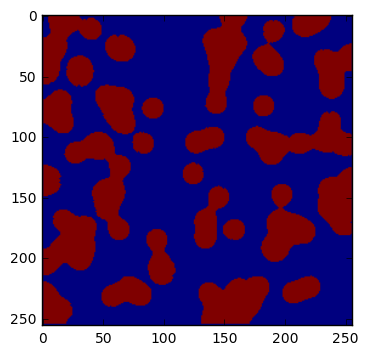

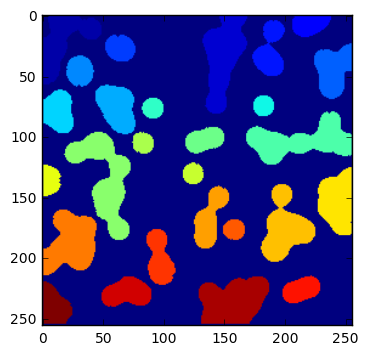

[(slice(1, 58, None), slice(1, 49, None)), (slice(1, 82, None), slice(132, 169, None)), (slice(1, 19, None), slice(206, 238, None)), (slice(5, 51, None), slice(173, 200, None)), (slice(17, 39, None), slice(52, 77, None)), (slice(24, 70, None), slice(224, 255, None)), (slice(34, 60, None), slice(20, 43, None)), (slice(58, 99, None), slice(44, 77, None)), (slice(62, 98, None), slice(1, 26, None)), (slice(67, 84, None), slice(174, 191, None)), (slice(69, 86, None), slice(82, 100, None)), (slice(80, 124, None), slice(168, 255, None)), (slice(93, 115, None), slice(118, 150, None)), (slice(97, 186, None), slice(18, 73, None)), (slice(97, 115, None), slice(74, 92, None)), (slice(122, 140, None), slice(116, 133, None)), (slice(124, 150, None), slice(1, 16, None)), (slice(126, 182, None), slice(227, 255, None)), (slice(140, 204, None), slice(180, 225, None)), (slice(141, 193, None), slice(125, 154, None)), (slice(161, 215, None), slice(1, 45, None)), (slice(169, 186, None), slice(149, 167, None

In [2]:
from skimage import measure, morphology
import numpy as np 
import scipy.ndimage as ndimage
import matplotlib.pyplot as plt


n = 10
l = 256
im = np.zeros((l, l))
np.random.seed(1)
points = l*np.random.random((2, n**2))
im[(points[0]).astype(np.int), (points[1]).astype(np.int)] = 1
im = ndimage.gaussian_filter(im, sigma=l/(4.*n))

mask = (im > im.mean()).astype(np.float)
mask += 0.1 * im
img = mask + 0.2*np.random.randn(*mask.shape)

hist, bin_edges = np.histogram(img, bins=60)
bin_centers = 0.5*(bin_edges[:-1] + bin_edges[1:])

binary_img = img > 0.5

plt.imshow(binary_img)
plt.show()

# Remove small white regions
open_img = ndimage.binary_opening(binary_img)
plt.imshow(open_img)
plt.show()

# Remove small black hole
close_img = ndimage.binary_closing(open_img)
plt.imshow(close_img)
plt.show()

labels = measure.label(close_img)
plt.imshow(labels)
plt.show()

loc = ndimage.find_objects(labels)

print(loc)

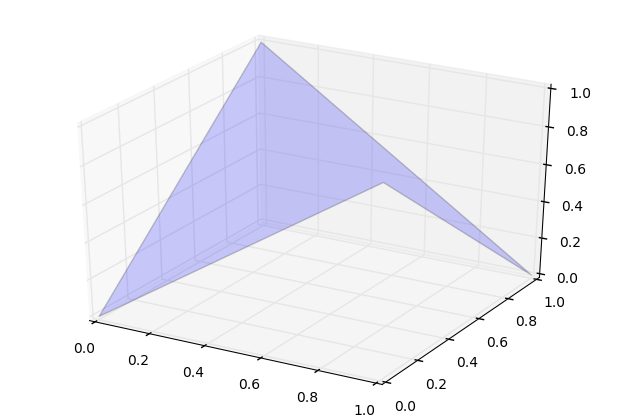

In [45]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
fig = plt.figure()
ax = Axes3D(fig)
x = [0,1,1,0]
y = [0,0,1,1]
z = [0,1,0,1]
verts = list(zip(x, y, z))
poly = Poly3DCollection([verts])
poly.set_alpha(0.2)
ax.autoscale()
ax.add_collection3d(poly)
plt.show()


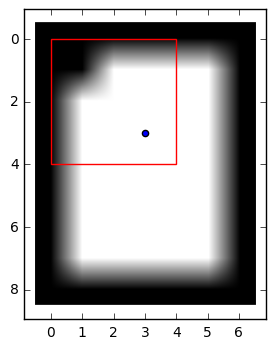

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import scipy.ndimage as ndimage

# im = np.asarray([[[0,0  ,1,1],[0,0,1,0],[0,0,1,0],[0,142,1,0]],
#                  [[0,212,1,0],[0,0,1,0],[0,0,1,0],[0,242,1,0]],
#                  [[0,312,1,0],[0,0,1,0],[0,0,1,0],[0,342,1,0]]])
im = np.asarray([[0,0,0,0,0,0,0],
                 [0,0,1,1,1,1,0],
                 [0,1,1,1,1,1,0],
                 [0,1,1,1,1,1,0],
                 [0,1,1,1,1,1,0],
                 [0,1,1,1,1,1,0],
                 [0,1,1,1,1,1,0],
                 [0,1,1,1,1,1,0],
                 [0,0,0,0,0,0,0]])

fig1, ax1 = plt.subplots(1)
ax1.imshow(im, cmap=plt.cm.gray)
ax1.scatter(3, 3)
ax1.add_patch(patches.Rectangle((0,0),4,4,linewidth=1,edgecolor='r',facecolor='none'))
plt.show()


In [45]:
from scipy.ndimage.interpolation import shift
import numpy as np

arrayToShift = np.reshape([i for i in range(27)],(3,3,3))

print('Before shift')
print(arrayToShift)

shiftVector = (0,0,0)
shiftedarray = shift(arrayToShift,shift=shiftVector,mode='wrap')

print('After shift')
print(shiftedarray)

Before shift
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]
After shift
[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


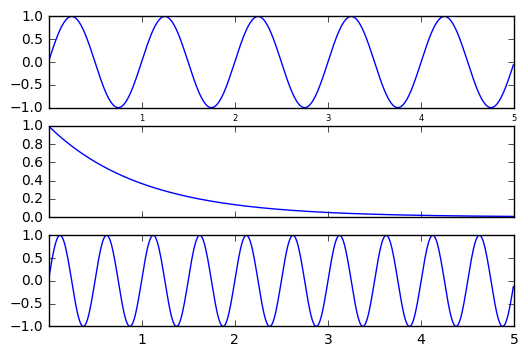

In [46]:
t = np.arange(0.01, 5.0, 0.01)
s1 = np.sin(2*np.pi*t)
s2 = np.exp(-t)
s3 = np.sin(4*np.pi*t)

ax1 = plt.subplot(311)
plt.plot(t, s1)
plt.setp(ax1.get_xticklabels(), fontsize=6)

# share x only
ax2 = plt.subplot(312, sharex=ax1)
plt.plot(t, s2)
# make these tick labels invisible
plt.setp(ax2.get_xticklabels(), visible=False)

# share x and y
ax3 = plt.subplot(313, sharex=ax1, sharey=ax1)
plt.plot(t, s3)
plt.xlim(0.01, 5.0)
plt.show()

